# **<h2> Importing the Libraries**

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.simplefilter('ignore')

# **Uploading DataSet**

In [3]:
data = pd.read_csv('master.csv')

In [4]:
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [5]:
#data에 존재하는 나라들을 뽑아옴(unique이므로 중복 X)
data.country.unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

In [6]:
#data에서 각 column의 type
data.dtypes

country               object
year                   int64
sex                   object
age                   object
suicides_no            int64
population             int64
suicides/100k pop    float64
country-year          object
HDI for year         float64
 gdp_for_year         object
gdp_per_capita         int64
generation            object
dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            27820 non-null  object 
 1   year               27820 non-null  int64  
 2   sex                27820 non-null  object 
 3   age                27820 non-null  object 
 4   suicides_no        27820 non-null  int64  
 5   population         27820 non-null  int64  
 6   suicides/100k pop  27820 non-null  float64
 7   country-year       27820 non-null  object 
 8   HDI for year       8364 non-null   float64
 9    gdp_for_year      27820 non-null  object 
 10  gdp_per_capita     27820 non-null  int64  
 11  generation         27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [8]:
#Data cleaning
#gdp_for_year에서 앞에 있는 들여쓰기를 지우자
data["gdp_for_year"] = data[" gdp_for_year"]

In [9]:
#inplace = True일 경우 원래의 데이터가 새로 만든 데이터로 대체된다.
#inplace = False일 경우 원래의 데이터는 새로 만든 데이터로 대체되지 않고 조건을 적용한 새로운 DataFrame 이 만들어진다.
data.drop([" gdp_for_year"], axis = 1, inplace = True)

In [10]:
#gdp_for_year 앞에 있는 들여쓰기가 사라진 것을 볼 수 있다.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            27820 non-null  object 
 1   year               27820 non-null  int64  
 2   sex                27820 non-null  object 
 3   age                27820 non-null  object 
 4   suicides_no        27820 non-null  int64  
 5   population         27820 non-null  int64  
 6   suicides/100k pop  27820 non-null  float64
 7   country-year       27820 non-null  object 
 8   HDI for year       8364 non-null   float64
 9   gdp_per_capita     27820 non-null  int64  
 10  generation         27820 non-null  object 
 11  gdp_for_year       27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [11]:
#gdp_for_year의 type이 object가 아니고 숫자였으면 좋겠다.
#이때 ,로 인해 문자열로 인식되므로 ,을 제거하겠다.
data["gdp_for_year"] = data.gdp_for_year.str.replace(",","")

In [12]:
#,가 제거된 모습
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_per_capita,generation,gdp_for_year
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,796,Generation X,2156624900
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,796,Silent,2156624900
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,796,Generation X,2156624900
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,796,G.I. Generation,2156624900
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,796,Boomers,2156624900


In [13]:
data["gdp_for_year"] = data["gdp_for_year"].astype(float)

In [14]:
#float으로 변환됨
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            27820 non-null  object 
 1   year               27820 non-null  int64  
 2   sex                27820 non-null  object 
 3   age                27820 non-null  object 
 4   suicides_no        27820 non-null  int64  
 5   population         27820 non-null  int64  
 6   suicides/100k pop  27820 non-null  float64
 7   country-year       27820 non-null  object 
 8   HDI for year       8364 non-null   float64
 9   gdp_per_capita     27820 non-null  int64  
 10  generation         27820 non-null  object 
 11  gdp_for_year       27820 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 2.5+ MB


# **Count Plot for Generations**

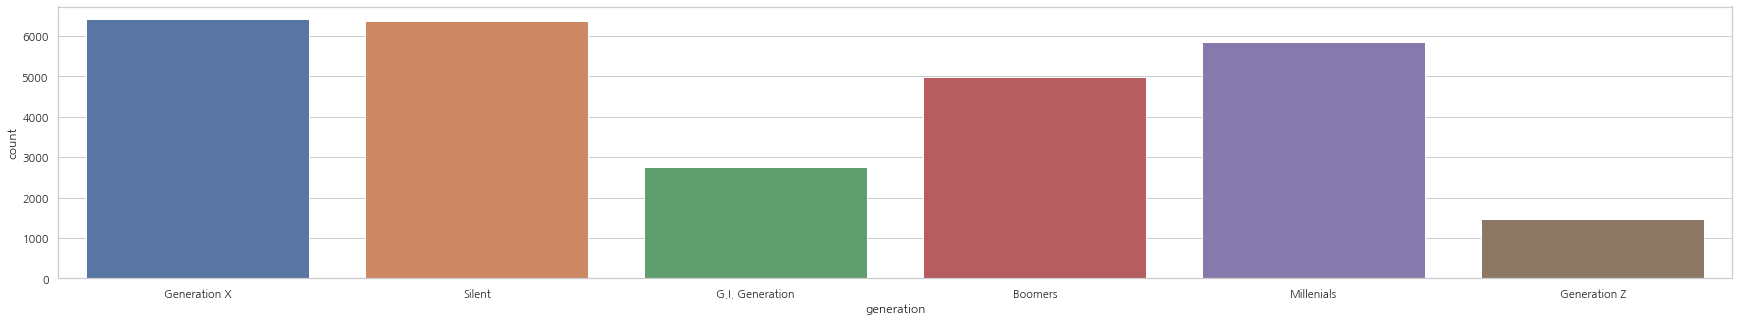

In [15]:
#가로30, 세로 5
plt.figure(figsize = (30,5))
sns.countplot(data['generation']);

# **Label Encoding**

In [16]:
#문자열로 표현된 데이터를 숫자로 바꿔주어 모델에 오류가 없도록 한다.
from sklearn.preprocessing import LabelEncoder
label_encoder1 = LabelEncoder()
data['sex'] = label_encoder1.fit_transform(data['sex'])

In [17]:
label_encoder2 = LabelEncoder()
data['generation'] = label_encoder2.fit_transform(data['generation'])

In [18]:
#data에서 NaN부분을 모두 0으로 채운다
data = data.fillna(0)

In [19]:
data.drop(columns = ['country', "country-year", "age"], axis = 1, inplace = True)

In [20]:
data.head()

,year,sex,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita,generation,gdp_for_year
0,1987,1,21,312900,6.71,0.0,796,2,2.156625e+09
1,1987,1,16,308000,5.19,0.0,796,5,2.156625e+09
2,1987,0,14,289700,4.83,0.0,796,2,2.156625e+09
3,1987,1,1,21800,4.59,0.0,796,1,2.156625e+09
4,1987,1,9,274300,3.28,0.0,796,0,2.156625e+09


# **Comparing Number of Suicides Between Both the sexes**

<AxesSubplot:xlabel='sex', ylabel='suicides_no'>

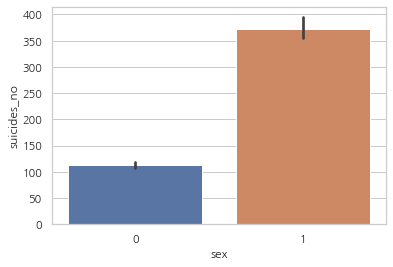

In [21]:
#막대(bar)그래프
#x축과 y축에서의 호출
#0은 여성, 1은 남성
sns.barplot(x = 'sex', y = 'suicides_no', data = data)

# **GDP trend over the given years**



<AxesSubplot:xlabel='year', ylabel='gdp_for_year'>

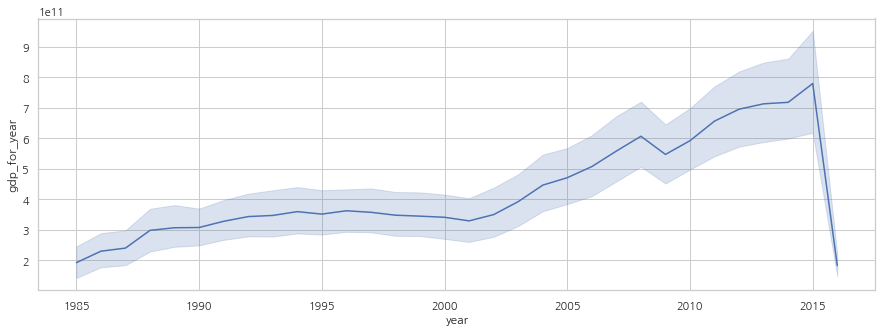

In [22]:
#추세를 보여줌
#중앙 선은 평균, 넓은 영역은 분포를 나타냄
plt.figure(figsize=(15,5))
sns.lineplot(x = 'year', y = 'gdp_for_year', data = data)

# **Suicide rate over the given period between both the genders**

<AxesSubplot:xlabel='year', ylabel='suicides_no'>

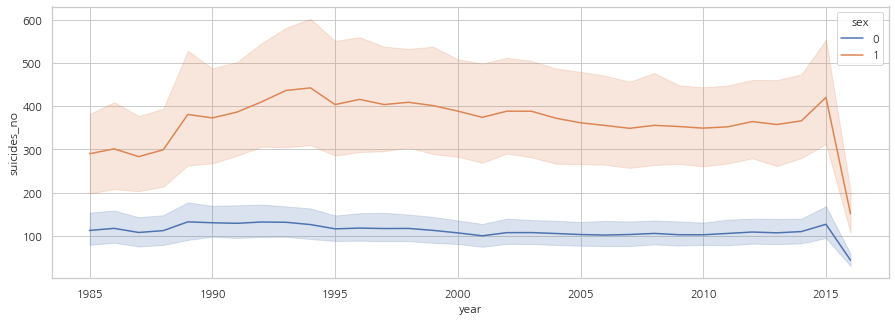

In [23]:
#시간의 흐름에 따른, 성별에 따른 자살률 변화
plt.figure(figsize=(15,5))
sns.lineplot(x = 'year', y ='suicides_no', hue = 'sex', data = data)

# **Using Correlation heatmap to find important features and their relations with other features**

In [24]:
data.corr()

,year,sex,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita,generation,gdp_for_year
year,1.000000e+00,-1.577200e-16,-0.004546,0.008850,-0.039037,3.431898e-01,3.391343e-01,2.683006e-01,9.452857e-02
sex,-1.577200e-16,1.000000e+00,0.144629,-0.011242,0.391496,7.337812e-17,-2.964946e-16,-2.929210e-17,-1.386038e-15
suicides_no,-4.545958e-03,1.446292e-01,1.000000,0.616162,0.306604,-1.730773e-02,6.132975e-02,-7.062371e-02,4.300959e-01
population,8.850170e-03,-1.124208e-02,0.616162,1.000000,0.008285,9.374731e-03,8.150986e-02,-6.796261e-02,7.106973e-01
suicides/100k pop,-3.903680e-02,3.914965e-01,0.306604,0.008285,1.000000,-2.290278e-02,1.785134e-03,-4.982007e-02,2.523964e-02
HDI for year,3.431898e-01,7.337812e-17,-0.017308,0.009375,-0.022903,1.000000e+00,2.165182e-01,4.865837e-02,7.375306e-02
gdp_per_capita,3.391343e-01,-2.964946e-16,0.061330,0.081510,0.001785,2.165182e-01,1.000000e+00,8.289921e-02,3.034045e-01
generation,2.683006e-01,-2.929210e-17,-0.070624,-0.067963,-0.049820,4.865837e-02,8.289921e-02,1.000000e+00,2.125070e-02
gdp_for_year,9.452857e-02,-1.386038e-15,0.430096,0.710697,0.025240,7.375306e-02,3.034045e-01,2.125070e-02,1.000000e+00


<AxesSubplot:>

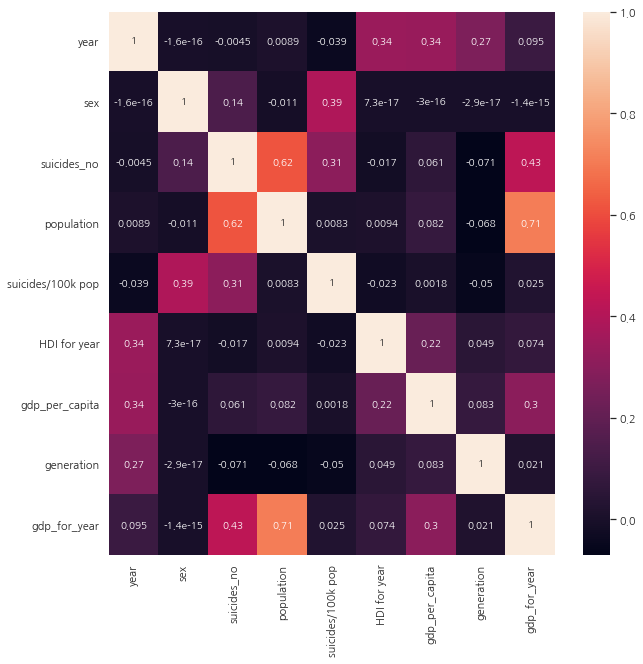

In [25]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot  = True)

3열을 보면 자살 수와 여럿 변수 간의 관계를 볼 수 있다.

In [26]:
#x and y 
x = data.drop("suicides_no",axis = 1)
y = data["suicides_no"]

# **Density plot for population**

In [27]:
#배경을 whitegrid로 설정
sns.set_style('whitegrid')

<AxesSubplot:xlabel='population', ylabel='Density'>

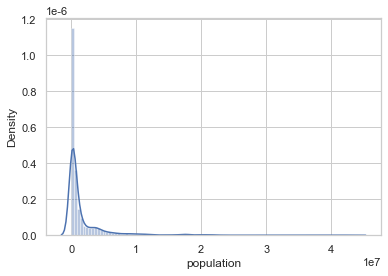

In [28]:
#distplot은 확률 분포
#bins는 막대 수
sns.distplot(x['population'], bins = 100)

<AxesSubplot:xlabel='population', ylabel='Density'>

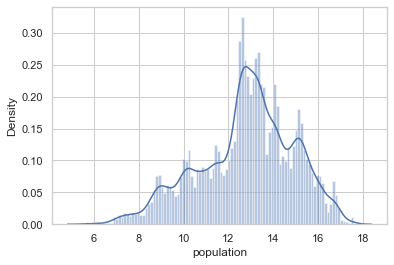

In [29]:
#로그를 취해서 분포 표시
#인구 밀도를 보여줌
sns.distplot(np.log(x['population']), bins = 100)

# **Studying Trends between Year and Suicide Numbers**

<AxesSubplot:xlabel='year', ylabel='suicides_no'>

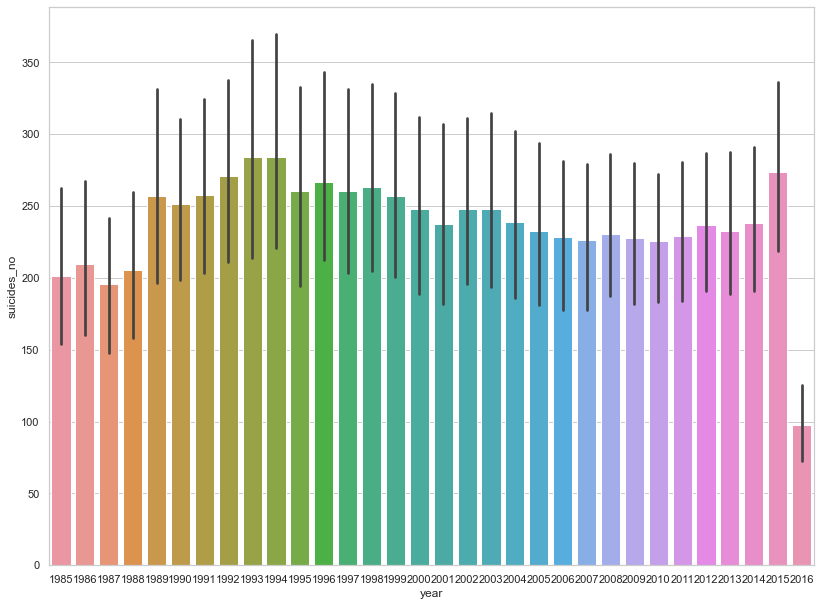

In [30]:
#plt.subplots()는 figure객체 생성, 이후 figure.subplots()를 호출하여 ax에 리턴(ax는 그래프들의 배경 집합)
#여기서는 아무것도 주지 않았으므로 빈 배경
fig, ax = plt.subplots()
#A4 size
fig.set_size_inches(13.7,10.27)
sns.barplot(x='year', y = 'suicides_no',data = data, ax = ax)

# **Studying Trends between Year and Population**

<AxesSubplot:xlabel='year', ylabel='population'>

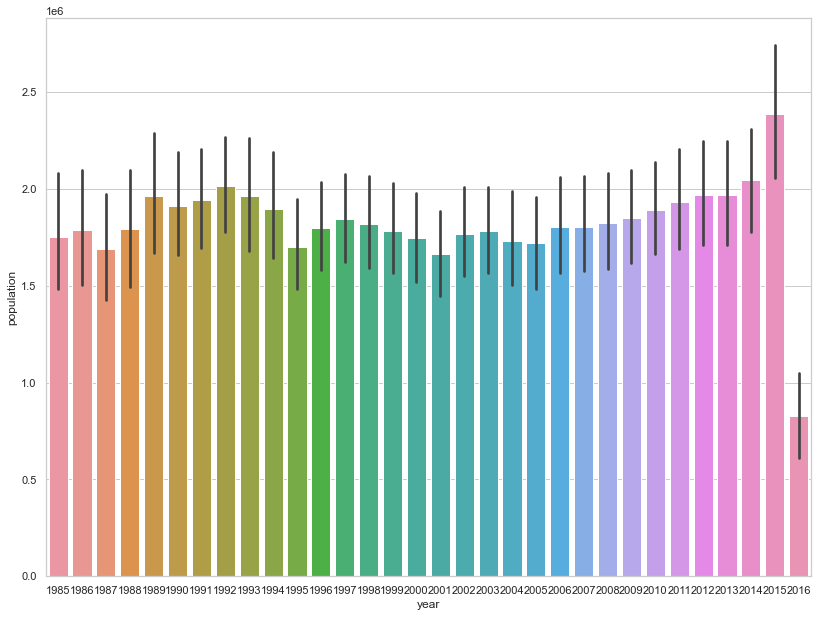

In [31]:
fig, ax = plt.subplots()
fig.set_size_inches(13.7,10.27)
sns.barplot(x = 'year', y='population', data = x)
#2016년 데이터가 적어서 아래와 같은 모양이 나온다

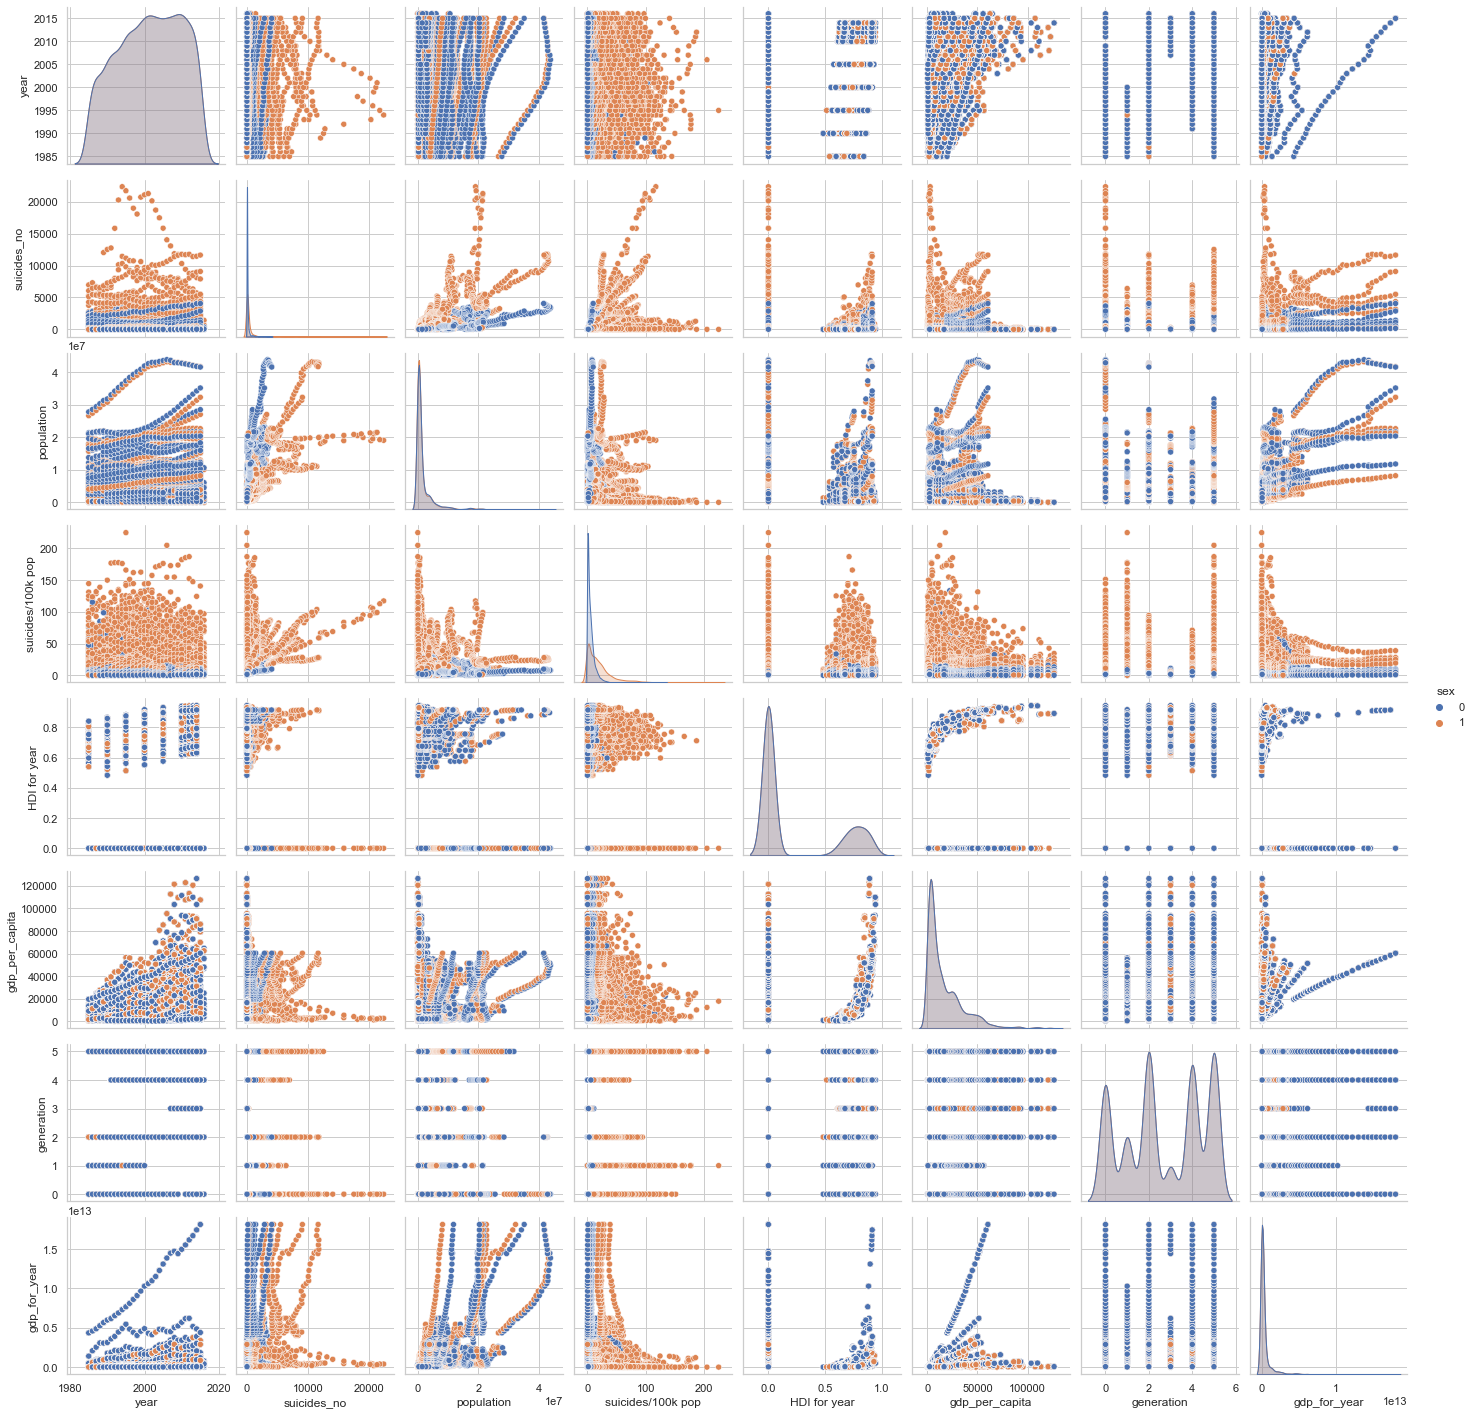

In [32]:
sns.pairplot(data,hue = 'sex')

# **Machine Learning Model**

**Spliting Training and Test Data**

In [33]:
from sklearn import model_selection

In [34]:
#default = 0.25
x_train, x_test, y_train, y_test = model_selection.train_test_split(x,y)

**Importing Algorithms**

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
#Support Vector Regression
from sklearn.svm import SVR

**Testing on Random Forest Regressor**

In [36]:
#n_estimator은 만들어지는 트리의 개수, random_state는 시드, criterion은 기준(mse는 최소 제곱)
alg1 = RandomForestRegressor(n_estimators=50, random_state = 0, criterion= 'mse')
alg1.fit(x_train, y_train)

RandomForestRegressor(n_estimators=50, random_state=0)

**Testing on Decision Tree Regressor**

In [37]:
alg2 = DecisionTreeRegressor()
alg2.fit(x_train, y_train)

DecisionTreeRegressor()

**Testing on Linear Regressor**

In [38]:
alg3 = LinearRegression()
alg3.fit(x_train, y_train)

LinearRegression()

**Testing on Support Vector Regression**

In [39]:
alg4 = SVR()
alg4.fit(x_train, y_train)

SVR()

**Predictiong the y values from our given models**

In [40]:
#predict
y_pred_1 = alg1.predict(x_test)
y_pred_2 = alg2.predict(x_test)
y_pred_3 = alg3.predict(x_test)
y_pred_4 = alg4.predict(x_test)

**Calculating and Printing the accuracy**

In [41]:
from sklearn import metrics

In [42]:
print("Random Forest RMSE : ", np.sqrt(metrics.mean_squared_error(y_test,y_pred_1)))
print("Decision Tree RMSE : ", np.sqrt(metrics.mean_squared_error(y_test,y_pred_2)))
print("Linear Regression RMSE : ", np.sqrt(metrics.mean_squared_error(y_test,y_pred_3)))
print("SVR RMSE : ", np.sqrt(metrics.mean_squared_error(y_test,y_pred_4)))

Random Forest RMSE :  58.10377850220176
Decision Tree RMSE :  69.05506716022536
Linear Regression RMSE :  653.8891560031792
SVR RMSE :  912.1301779855985


자살에 가장 큰 영향을 미치는 것은 population, gdp_for_year이고 남성이 여성보다 자살률이 높다